In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import warnings
warnings.filterwarnings('ignore')

In [507]:
walmart = pd.read_csv('walmart.csv')
target = pd.read_csv('target.csv')
amazon = pd.read_csv('amazon.csv')
costco = pd.read_csv('costco.csv')
kroger = pd.read_csv('kroger.csv')

In [508]:
df = pd.concat(map(pd.read_csv, ['walmart.csv', 'target.csv','amazon.csv','costco.csv','kroger.csv']),ignore_index = True)

In [509]:
df.tail()

year company                                       tokens_final
3710  2019  Kroger  ['company', 'termination', 'cause', 'treatment...
3711  2019  Kroger  ['purpose', 'approve', 'company', 'provide', '...
3712  2019  Kroger  ['security', 'restriction', 'represent', 'book...
3713  2019  Kroger  ['case', 'rate', 'jurisdiction', 'approve', 'd...
3714  2019  Kroger  ['company', 'extent', 'deems', 'discretion', '...

In [510]:
df.loc[:,'tokens_final'] = df.loc[:,'tokens_final'].apply(lambda x: literal_eval(x))

### Additional Text Pre-processing

In [511]:
def replace_in_list(lis, old, new):
    for i in range(len(lis)):
        if lis[i] == old:
            lis[i] = new
    return(lis)

df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"employee", "associate"))
df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"guest", "customer"))
# df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"member", "customer"))
df['tokens_final'] = df['tokens_final'].map(lambda x: replace_in_list(x,"consumer", "customer"))

In [512]:
remove_words =['officer','award','amount','cash','chairman','vice','option','president',
              'base','inc.','grant','voting','election','unit','audit','date','include', 'management',
              'number','name','person','proposal','section','report','cost','receive','pension','rate','interest',
              'fuel','pension','policy','governance','vest','asset','equity','rsus','participant','risk','defer',
              'fund','increase','service','bonus','sale','table','pricewaterhousecoopers','price','accounting',
              'restrict','exercise','group','period','hold','require','earnings','material','corporation','harris',
               'teeter','termination','item','elect','effect','mean','review','earn','business','dillon','income',
              'food','make','week','nomination','right','mcmullen','value']

df["tokens_final"] = df["tokens_final"].map(lambda x: [word for word in x if word.lower() not in remove_words])

In [513]:
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [514]:
dictionary = gensim.corpora.Dictionary(df["tokens_final"])

dictionary.filter_extremes(no_below=1, no_above=0.5) #, keep_n=100000)

bow_corpus = [dictionary.doc2bow(word) for word in df["tokens_final"]]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, 
                                       passes=2, workers=2, chunksize=100, random_state=1000)

In [515]:
pp.pprint(lda_model.print_topics())

[   (   0,
        '0.052*"liability" + 0.042*"obligation" + 0.040*"loss" + '
        '0.034*"capital" + 0.031*"recognize" + 0.027*"debt" + 0.026*"expense" '
        '+ 0.024*"market" + 0.023*"flow" + 0.018*"consolidate"'),
    (   1,
        '0.049*"serve" + 0.047*"experience" + 0.021*"leadership" + '
        '0.020*"member" + 0.018*"technology" + 0.017*"customer" + '
        '0.016*"product" + 0.014*"qualification" + 0.012*"position" + '
        '0.012*"finance"'),
    (   2,
        '0.028*"store" + 0.027*"customer" + 0.018*"product" + 0.014*"believe" '
        '+ 0.013*"expect" + 0.012*"continue" + 0.012*"facility" + '
        '0.011*"associate" + 0.010*"result" + 0.009*"inventory"'),
    (   3,
        '0.047*"security" + 0.040*"ownership" + 0.040*"investment" + '
        '0.032*"power" + 0.032*"contribution" + 0.023*"file" + '
        '0.022*"information" + 0.019*"owner" + 0.018*"trust" + '
        '0.017*"percent"'),
    (   4,
        '0.048*"auditor" + 0.036*"control" + 0.034*

In [516]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

In [517]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.236919 -0.020422       1        1  13.014843
13     0.102852  0.124106       2        1  12.103827
2      0.122939 -0.120304       3        1  10.298319
10     0.213524  0.102860       4        1  10.207396
1     -0.065000 -0.198131       5        1   8.810590
7      0.076110 -0.075805       6        1   7.235598
12    -0.119430 -0.164670       7        1   6.923834
5     -0.184704  0.161206       8        1   5.932382
0      0.204140  0.067105       9        1   4.797040
6     -0.000532 -0.230142      10        1   4.541819
11    -0.237292  0.185039      11        1   4.113998
3      0.057025  0.147154      12        1   4.063298
4     -0.113728  0.020649      13        1   3.367045
14    -0.109249  0.164062      14        1   2.476783
9     -0.183573 -0.162707      15        1   2.113225, topic_info=             Term         Freq        Total Category  logprob  loglift
441   performance  7662.000000  7662.000000  Default  30.0000  30.0000
302       benefit  4343.000000  4343.000000  Default  29.0000  29.0000
332    experience  2278.000000  2278.000000  Default  28.0000  28.0000
61       security  2153.000000  2153.000000  Default  27.0000  27.0000
169        member  2616.000000  2616.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
93    information   172.317719  2547.417725  Topic15  -3.9182   1.1635
868     criterion    85.518677   480.379486  Topic15  -4.6188   2.1311
49        process    95.447235   871.187378  Topic15  -4.5089   1.6457
69           time   125.636848  3064.610840  Topic15  -4.2341   0.6627
1270     identify    69.794861   426.393646  Topic15  -4.8219   2.0472

[1012 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1510      9  0.835412      -years
289       1  0.036018     ability
289       2  0.065488     ability
289       3  0.414209     ability
289       4  0.009823     ability
...     ...       ...         ...
186      14  0.300854        york
2121      2  0.978838        zone
2746     11  0.909225       •vote
2823      7  0.868100  ••oversees
2825      7  0.840428   ••reviews

[3992 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 14, 3, 11, 2, 8, 13, 6, 1, 7, 12, 4, 5, 15, 10])

In [518]:
def format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']]):
    # Init output
    page_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                page_topics_df = page_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    page_topics_df.columns = ['topic', 'perc_contribution', 'topic_keywords']

    # Add original text to the end of the output
    page_topics_df = pd.concat([texts,page_topics_df], axis=1)
    return(page_topics_df)


df_topic_pages_keywords = format_topics_pages(ldamodel=lda_model, corpus=bow_corpus, texts=df[['year','company','tokens_final']])

# Format
df_dominant_topic = df_topic_pages_keywords.reset_index()
df_dominant_topic = df_dominant_topic.drop('index',axis=1)

# Show
df_dominant_topic.head(10)

year  company                                       tokens_final  topic  \
0  2010  Walmart  [street, website, www.walmartstores.com, notic...   11.0   
1  2010  Walmart  [wal-mart, store, street, website, www.walmart...   12.0   
2  2010  Walmart  [nonqualified, compensation, potential, paymen...    7.0   
3  2010  Walmart  [compensation, store, compensation, amend, jan...   13.0   
4  2010  Walmart  [nominee, statement, company, ratification, ap...    5.0   
5  2010  Walmart  [broker, broker, occur, register, provide, rec...   11.0   
6  2010  Walmart  [revoke, revoke, record, holder, filing, write...    5.0   
7  2010  Walmart  [owner, street, describe, bank, broker, availa...    1.0   
8  2010  Walmart  [michele, burn, burn, mercer, subsidiary, mars...    1.0   
9  2010  Walmart  [michael, duke, serve, position, appointment, ...    1.0   

   perc_contribution                                     topic_keywords  
0             0.4849  card, record, instruction, internet, mail, tim...  
1             0.3225  member, chair, structure, responsibility, role...  
2             0.2668  program, discussion, hedge, performance, analy...  
3             0.3922  agreement, associate, term, time, payment, tra...  
4             0.9602  access, copy, nominee, notice, broker, secreta...  
5             0.6110  card, record, instruction, internet, mail, tim...  
6             0.5957  access, copy, nominee, notice, broker, secreta...  
7             0.4379  serve, experience, leadership, member, technol...  
8             0.9885  serve, experience, leadership, member, technol...  
9             0.9940  serve, experience, leadership, member, technol...

In [519]:
df_trend = pd.crosstab([df_dominant_topic["company"],df_dominant_topic["year"]], 
                       df_dominant_topic["topic"], normalize="index")
years = [str(x) for x in df_trend.index]

In [520]:
df_trend.columns = ['topic_0','topic_1','topic_2','topic_3','topic_4',
              'topic_5','topic_6','topic_7','topic_8','topic_9','topic_10','topic_11',
                   'topic_12','topic_13','topic_14'] 

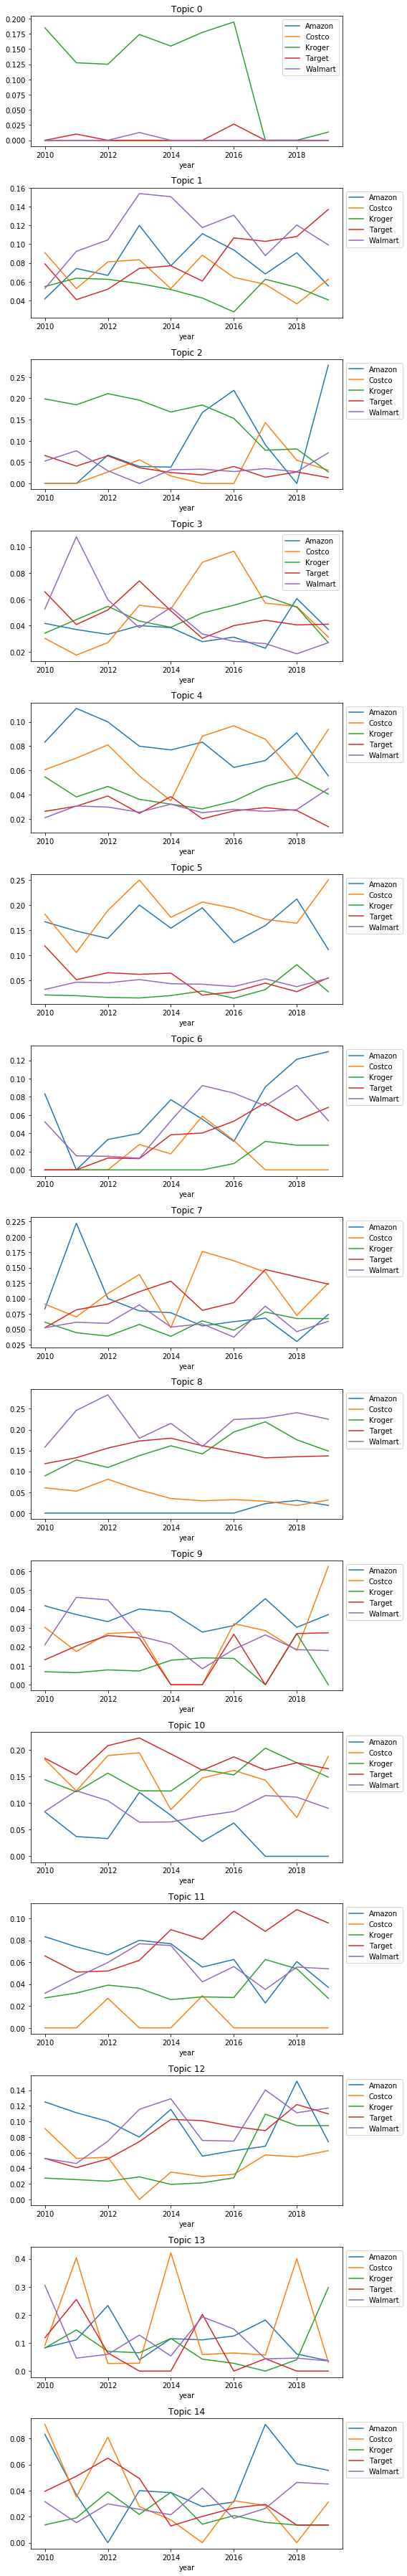

In [524]:
f, a = plt.subplots(15,1,figsize=(8, 50))

df_trend.reset_index().pivot('year','company','topic_0').plot(ax=a[0], title='Topic 0').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_1').plot(ax=a[1], title='Topic 1').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_2').plot(ax=a[2], title='Topic 2').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_3').plot(ax=a[3], title='Topic 3').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_4').plot(ax=a[4], title='Topic 4').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_5').plot(ax=a[5], title='Topic 5').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_6').plot(ax=a[6], title='Topic 6').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_7').plot(ax=a[7], title='Topic 7').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_8').plot(ax=a[8], title='Topic 8').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_9').plot(ax=a[9], title='Topic 9').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_10').plot(ax=a[10], title='Topic 10').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_11').plot(ax=a[11], title='Topic 11').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_12').plot(ax=a[12], title='Topic 12').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_13').plot(ax=a[13], title='Topic 13').legend(bbox_to_anchor=(1, 1))
df_trend.reset_index().pivot('year','company','topic_14').plot(ax=a[14], title='Topic 14').legend(bbox_to_anchor=(1, 1))

f.tight_layout()

In [522]:
# companies = df_dominant_topic['company']
# ct_dic = dict()
# for company in companies:
#     tmp_df = df_dominant_topic[df_dominant_topic["company"]==company]
#     ct_dic[company] = pd.crosstab(tmp_df["year"],tmp_df["topic"], normalize="index")

In [523]:
# year = list(range(2010,2020))
# for topic in range(1,16):
    
#     fig, ax = plt.subplots()
#     for company in companies:
#         plt.plot(year, ct_dic[company][topic].values, label=company)
#     ax.legend()
#     plt.ylim(0, 0.35)
#     plt.xticks(year, year, rotation='vertical')
#     plt.title("topic "+ str(topic))
#     plt.show()